<a href="https://colab.research.google.com/github/Sandikadata/TCS-STOCK/blob/main/TCS_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
!git clone https://github.com/Sandikadata/TCS-STOCK.git

Cloning into 'TCS-STOCK'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
!pip install tqdm

In [ ]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [ ]:
from tqdm import tqdm


**Reading Data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TCS_stock_history.csv')

In [ ]:
df.shape

(4463, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4463 non-null   object 
 1   Open                4463 non-null   float64
 2   High                4463 non-null   float64
 3   Low                 4463 non-null   float64
 4   Close               4463 non-null   float64
 5   Volume              4463 non-null   int64  
 6   Dividends           4463 non-null   float64
 7   Stock Splits        4463 non-null   int64  
 8   50_MA               4414 non-null   float64
 9   200_MA              4264 non-null   float64
 10  Signal              4463 non-null   int64  
 11  Daily_Price_Change  4462 non-null   float64
 12  Moving_Avg_Close    4457 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 453.4+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.sort_values(by='Date')

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,200_MA,Signal,Daily_Price_Change,Moving_Avg_Close
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000,4414.000000,4264.000000,4463.000000,4462.000000,4457.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344,855.296524,827.939710,0.755770,0.161259,865.125930
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000,28.226462,38.361673,0.000000,-50.611112,27.260585
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000,186.661243,192.689310,1.000000,-0.908579,187.612115
50%,2012-09-04 00:00:00,530.907531,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000,537.554927,530.090287,1.000000,0.042393,528.581874
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622801,1154.784851,4.278625e+06,0.000000,0.000000,1142.421716,1125.963538,1.000000,1.096282,1154.080601
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000,3584.287983,3227.919528,1.000000,201.888698,3874.314279
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842,802.197464,738.556791,0.429678,4.010903,826.147073


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,200_MA,Signal,Daily_Price_Change,Moving_Avg_Close
Date,,,,,,,,,,,,
2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0,NaN,NaN,0,NaN,NaN
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0,NaN,NaN,0,-1.353915,NaN
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0,NaN,NaN,0,-6.894351,NaN
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0,NaN,NaN,0,0.000000,NaN
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0,NaN,NaN,0,-0.239988,NaN


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,200_MA,Signal,Daily_Price_Change,Moving_Avg_Close
Date,,,,,,,,,,,,
2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0,3536.461992,3206.886368,1,0.052983,3860.042864
2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0,3549.049990,3212.555027,1,-0.887301,3850.564279
2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0,3560.573989,3217.884388,1,-1.506406,3843.607108
2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0,3572.515986,3222.982157,1,0.337377,3839.092808
2021-09-30,3805.000000,3805.000000,3765.000000,3773.199951,640479,0.0,0,3584.287983,3227.919528,1,-0.493155,3826.271380


In [ ]:
df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,200_MA,Signal,Daily_Price_Change,Moving_Avg_Close
Open,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715,0.997051,0.989297,0.255881,-0.013351,0.999694
High,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597,0.997119,0.989460,0.254970,-0.010330,0.999654
Low,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622,0.996901,0.989098,0.256401,-0.010428,0.999605
Close,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635,0.996965,0.989252,0.255617,-0.007654,0.999561
Volume,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752,-0.166477,-0.208166,-0.016681,-0.000271,-0.155219
Dividends,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493,0.060698,0.061458,0.018421,0.004476,0.059326
Stock Splits,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000,-0.008144,-0.010607,0.014743,-0.004274,-0.006554
50_MA,0.997051,0.997119,0.996901,0.996965,-0.166477,0.060698,-0.008144,1.000000,0.994216,0.235406,-0.015629,0.997666
200_MA,0.989297,0.989460,0.989098,0.989252,-0.208166,0.061458,-0.010607,0.994216,1.000000,0.137648,-0.010081,0.989991
Signal,0.255881,0.254970,0.256401,0.255617,-0.016681,0.018421,0.014743,0.235406,0.137648,1.000000,-0.006224,0.254311


In [ ]:
corr_with_close=df.corr()['Close']

In [ ]:
corr_with_close

,Close
Open,0.999787
High,0.999914
Low,0.999901
Close,1.000000
Volume,-0.152844
Dividends,0.060179
Stock Splits,-0.006635
50_MA,0.996965
200_MA,0.989252
Signal,0.255617


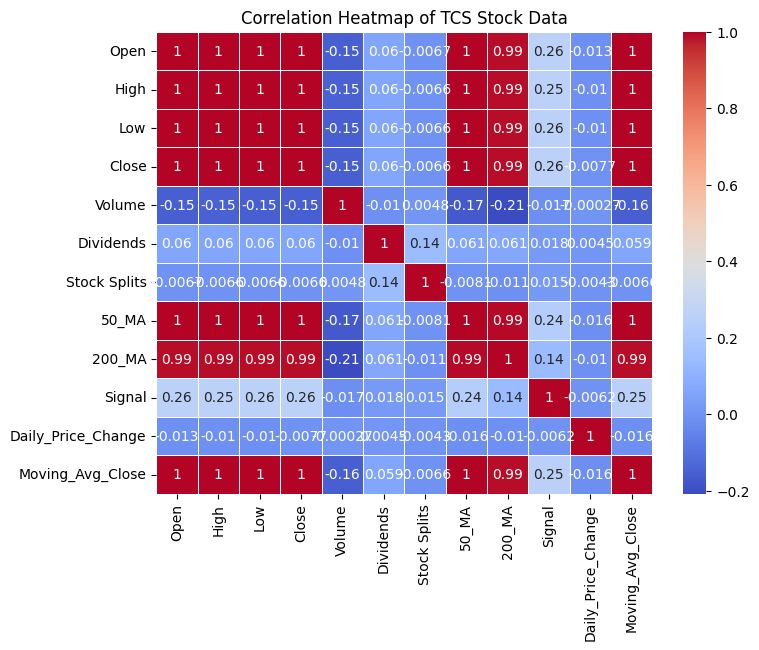

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of TCS Stock Data')
plt.show()


**Stock Price Analysis**

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

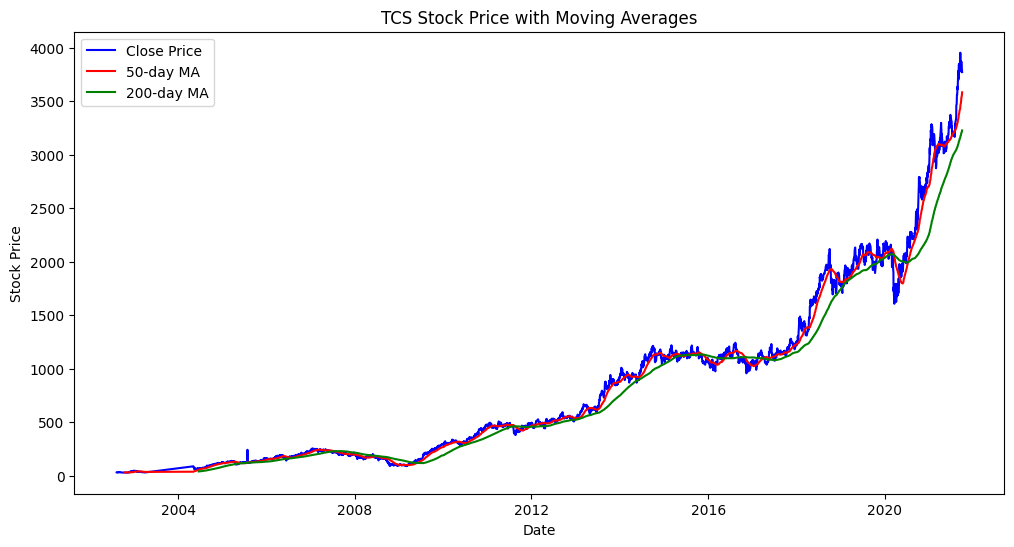

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['50_MA'], label='50-day MA', color='red')
plt.plot(df['Date'], df['200_MA'], label='200-day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

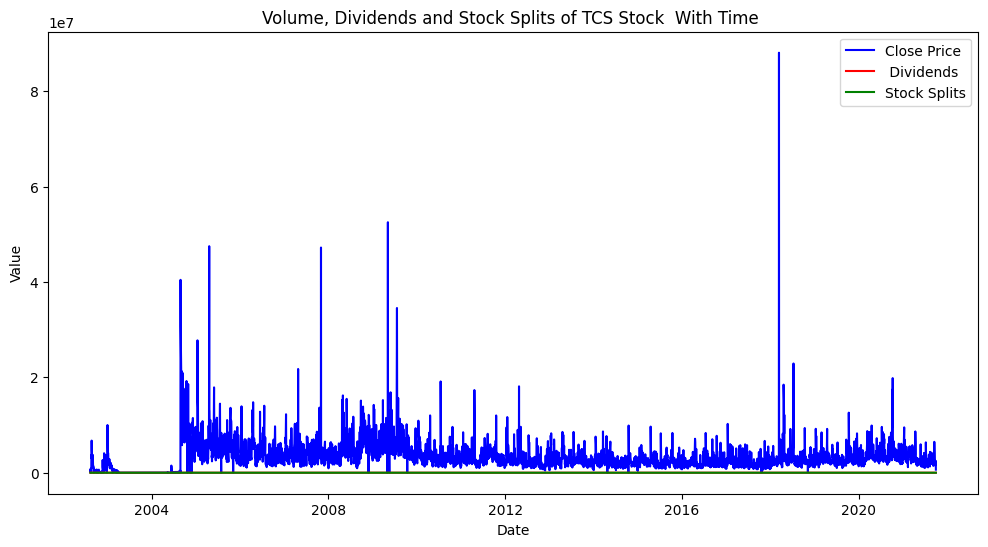

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Dividends'], label=' Dividends', color='red')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends and Stock Splits of TCS Stock  With Time ')
plt.legend()
plt.show()

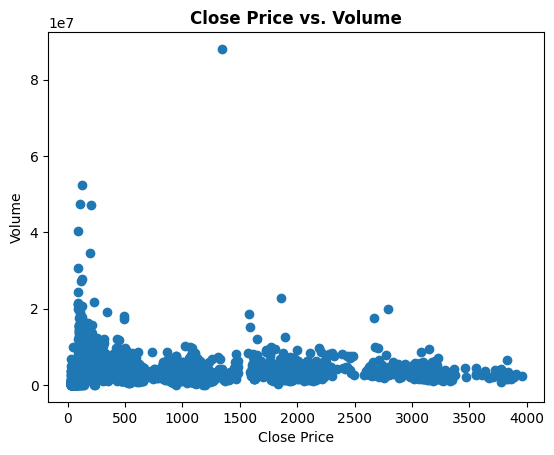

In [ ]:
 plt.scatter(df['Close'], df['Volume'])
 plt.xlabel('Close Price')
 plt.ylabel('Volume')
 plt.title('Close Price vs. Volume',weight= "bold")
 plt.show()


**Dividends vs. Close Price**

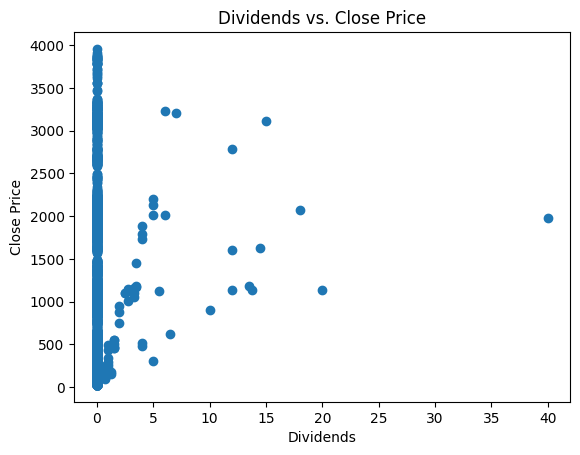

In [ ]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

**Stock Splits vs. Close Price**

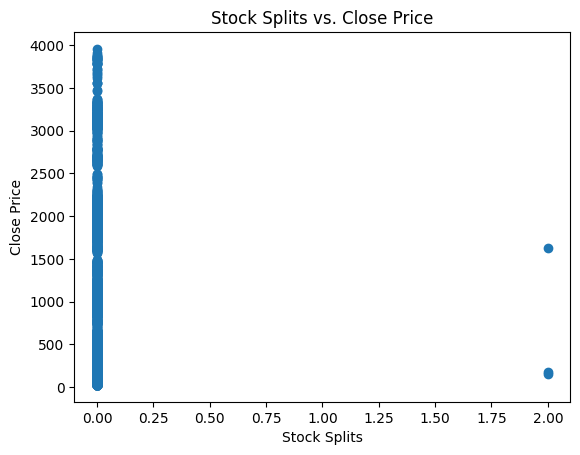

In [ ]:
# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

In [ ]:
df['Signal']=np.where(df['50_MA']>df['200_MA'],1,0)

**Plot the strategy signals**

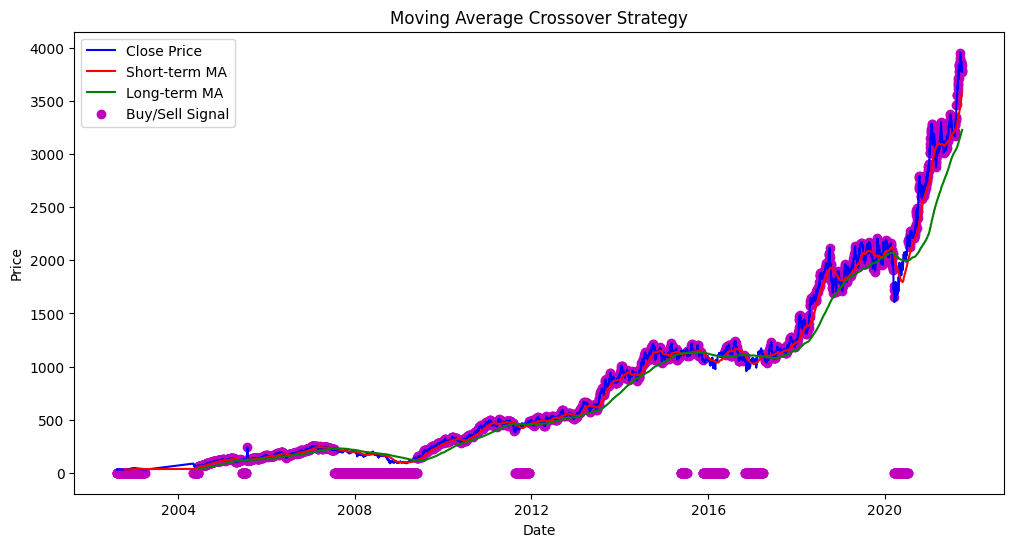

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',color='b')
plt.plot(df['Date'], df['50_MA'], label='Short-term MA',color='r')
plt.plot(df['Date'], df['200_MA'], label='Long-term MA',color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

In [ ]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

**Distribution of daily percentage change**

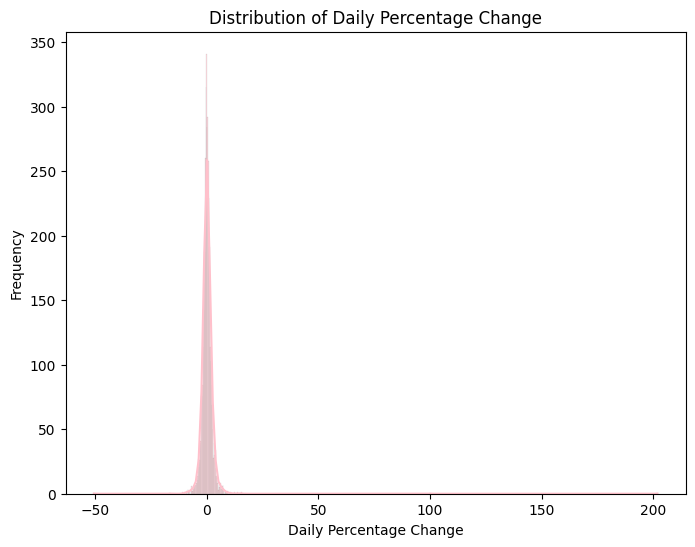

In [ ]:
# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,color='pink')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [ ]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [ ]:
df.shape

(4463, 13)

**Data Preparation and Normalization and Modeling**

In [ ]:
 X_train = df['Close'].values.reshape(-1, 1)
 y_train = df['Close'].shift(-1).dropna().values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
 test_ratio = 0.2
 test_size = int(len(df) * test_ratio)
 test_data = df[-test_size:]

In [ ]:
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [ ]:
 X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
 y_train_lstm = X_train_scaled[1:]

In [ ]:
 model = Sequential()
 model.add(LSTM(50, input_shape=(1, 1)))
 model.add(Dense(1))
 model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
 epochs = 30
 batch_size = 15

In [ ]:
for epoch in tqdm(range(epochs), desc="Training Progress"):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)


Training Progress: 100%|██████████| 30/30 [00:22<00:00,  1.34it/s]


In [ ]:
 X_test = test_data['Close'].values.reshape(-1, 1)
 X_test_scaled = scaler.transform(X_test)
 X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [ ]:
 lstm_predictions = model.predict(X_test_lstm).flatten()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
 lstm_predictions = lstm_predictions.reshape(-1, 1)
 lstm_predictions = scaler.inverse_transform(lstm_predictions)

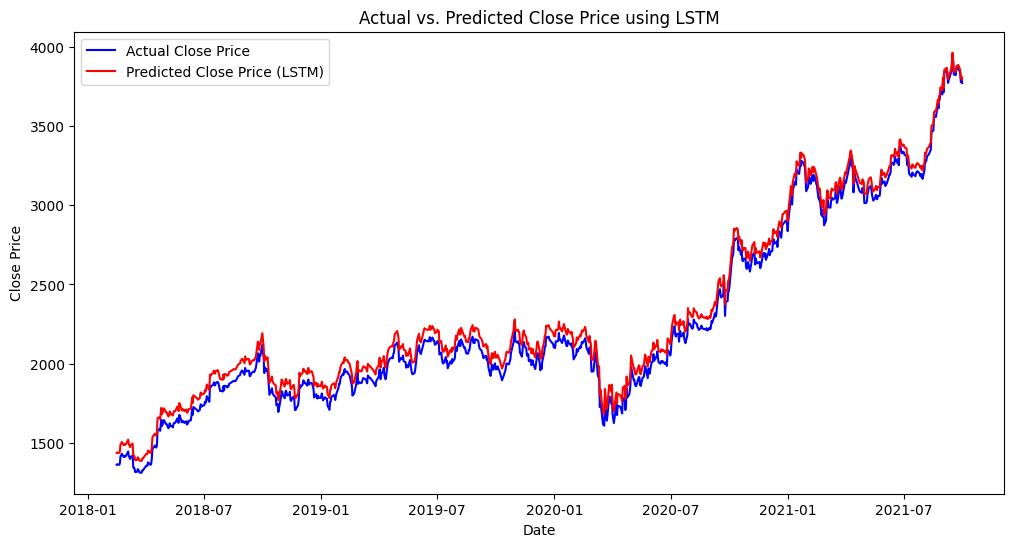

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [ ]:
df.to_csv("/content/drive/MyDrive/TCS_stock_history.csv", index=False)